In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def getDataFrameFromCSV(filePath):
    df = pd.read_csv(filePath + '.csv')
    return df

In [3]:
def createPlot(dataFrame, columnName, plotTitle = ""):
    colValues = dataFrame[columnName]
    dateValues = dataFrame['date']
    ypoints = np.array(colValues)
    xpoints = np.array(dateValues)
    f = plt.figure()
    f.set_figwidth(12)
    f.set_figheight(6)
    plt.plot(xpoints, ypoints, color='green')
    plt.title(plotTitle)
    plt.xlabel("days")
    plt.ylabel("price")
    plt.show()

In [4]:
df = getDataFrameFromCSV('../../data/price_data/spices/spices')

In [5]:
print("Data Types:")
print(df.dtypes)

Data Types:
product_name           object
weight_raw             object
weight_value            int64
weight_unit            object
price_raw              object
price                   int64
discount_price_raw     object
discount_price        float64
date                   object
time                   object
dtype: object


In [6]:
print("Sample Data:")
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
print(df.head(10))

Sample Data:
                        product_name weight_raw  weight_value weight_unit  \
0                       Cumin (Jira)     100 gm           100          gm   
1         Cinnamon (Daruchini) Whole     100 gm           100          gm   
2     Radhuni Chilli (Morich) Powder     200 gm           200          gm   
3    Radhuni Turmeric (Holud) Powder     200 gm           200          gm   
4            Cardamom (Elachi) Whole      50 gm            50          gm   
5     Dried Chillies (Shukna Morich)     100 gm           100          gm   
6        Radhuni Cumin (Jira) Powder     100 gm           100          gm   
7    Radhuni Turmeric (Holud) Powder     100 gm           100          gm   
8  Radhuni Coriander (Dhonia) Powder     100 gm           100          gm   
9     Radhuni Chilli (Morich) Powder     100 gm           100          gm   

  price_raw  price discount_price_raw  discount_price       date      time  
0      ৳ 70     70               ৳ 49            49.0 2022-10-

In [7]:
def showLineGraph(dataFrame, item, weight):
    df = dataFrame
    itemName = item
    filteredDf = df.loc[(df.product_name == itemName) & (df.weight_value == weight)]
    createPlot(filteredDf, 'price', itemName)

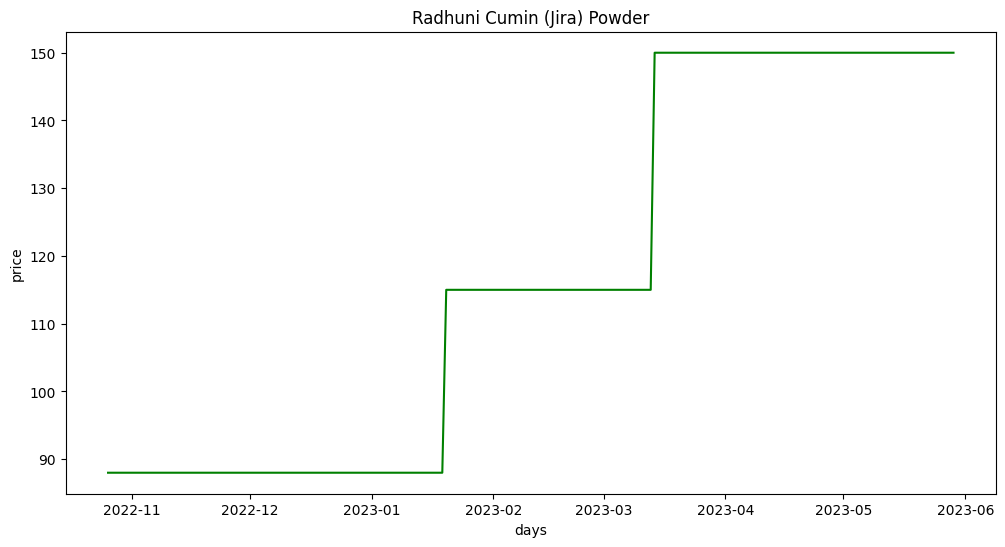

In [8]:
showLineGraph(df, "Radhuni Cumin (Jira) Powder", 100)

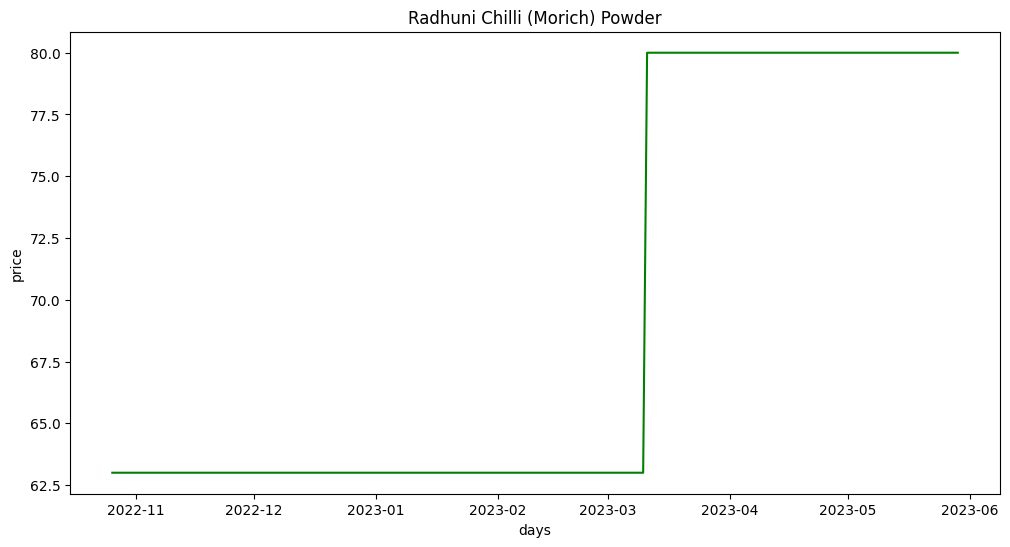

In [9]:
showLineGraph(df, "Radhuni Chilli (Morich) Powder", 100)

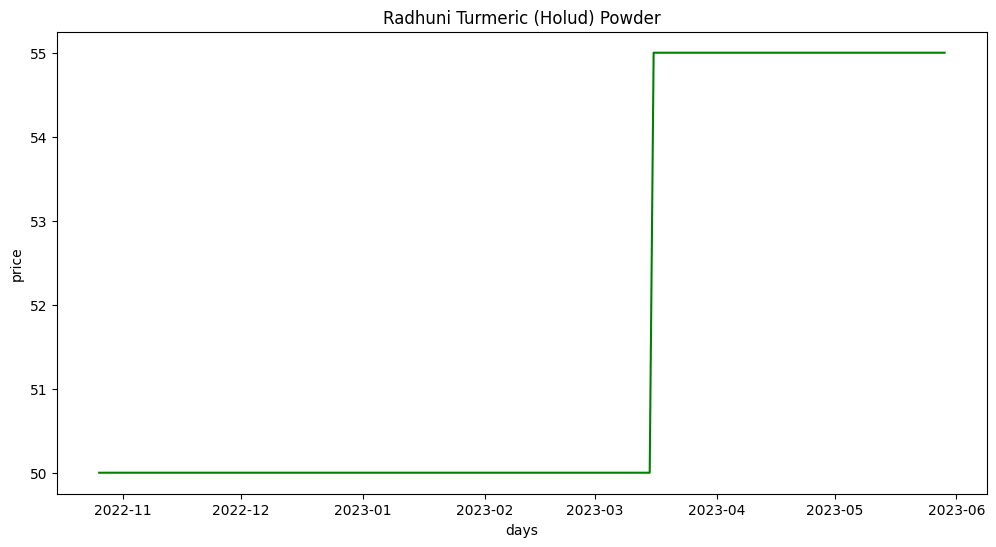

In [10]:
showLineGraph(df, "Radhuni Turmeric (Holud) Powder", 100)

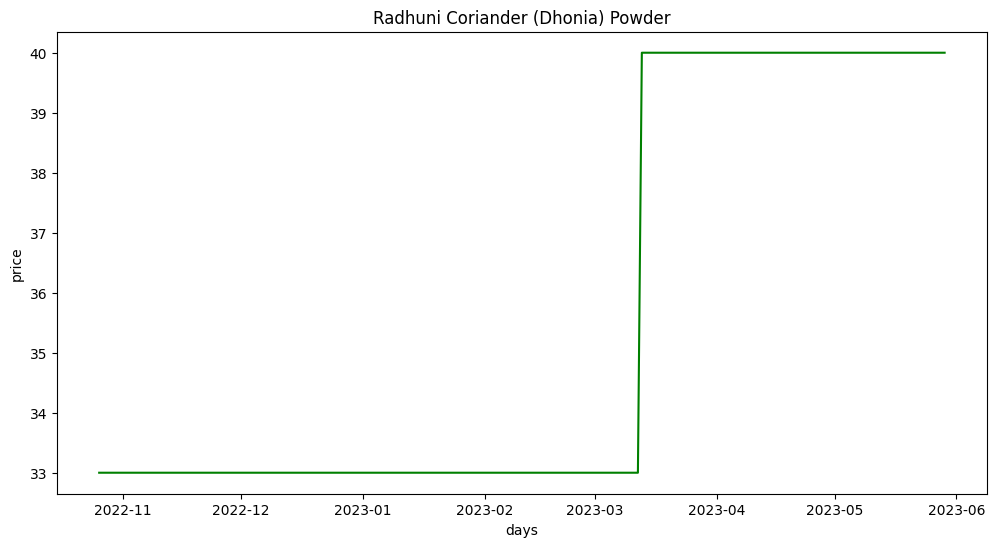

In [11]:
showLineGraph(df, "Radhuni Coriander (Dhonia) Powder", 100)

In [12]:
def createMultilinePlot(dataFrames, columnNames, plotTitle = "", weight = ["1"], lineNames = []):
    f = plt.figure()
    f.set_figwidth(8)
    f.set_figheight(4)
    i = 0
    pltTitle = "Unit " + str(weight[0])
    colors = ['g', 'b', 'c', 'k']
    for dataFrame, columnName in zip(dataFrames, columnNames):
        #dataFrame.head(3)
        colValues = dataFrame[columnName]
        dateValues = dataFrame['date']
        ypoints = np.array(colValues)
        xpoints = np.array(dateValues)
        plt.plot(xpoints, ypoints, color=colors[i], label=lineNames[i])
        i += 1
        i %= len(colors)
    #plt.title(plotTitle+ "\n unit:"+ weight)
    plt.xlabel("days")
    plt.ylabel("price BDT")
    plt.legend(loc='best')
    plt.title(pltTitle)
    plt.show()

In [13]:
def showMultipleLineGraph(dataFrame, items, weights, weightRaws):
    filteredDfs = []
    itemNames = []
    df = dataFrame
    for itemName, weight in zip(items,weights):
        itemNames.append(itemName)
        filteredDf = df.loc[(df.product_name == itemName) & (df.weight_value == weight)]
        filteredDfs.append(filteredDf)
    createMultilinePlot(filteredDfs, ['price','price', 'price', 'price'], itemNames, weightRaws, items)

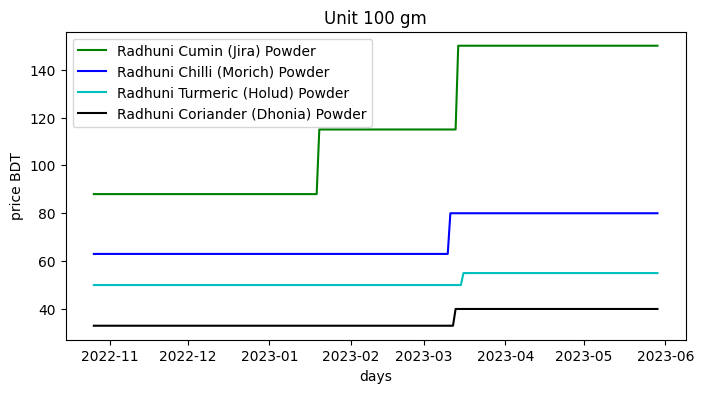

In [14]:
items = ["Radhuni Cumin (Jira) Powder",
         "Radhuni Chilli (Morich) Powder",
         "Radhuni Turmeric (Holud) Powder",
         "Radhuni Coriander (Dhonia) Powder"]
showMultipleLineGraph(df, items, [100,100,100,100], [ "100 gm","100 gm", "100 gm", "100 gm"])